In [45]:
import networkx as nx
import random
import itertools

#### Use network 1

In [2]:
G = nx.read_edgelist("Network 1.txt")

In [3]:
bfs1 = nx.bfs_tree(G, random.sample(list(G.nodes), 1)[0])

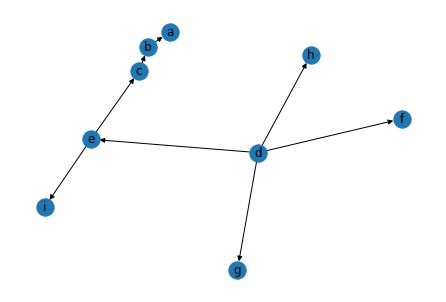

In [4]:
nx.draw(bfs1, with_labels = True)

In [5]:
bfs2 = nx.bfs_tree(G, random.sample(list(G.nodes), 1)[0])
bfs2 = nx.convert_node_labels_to_integers(bfs2)

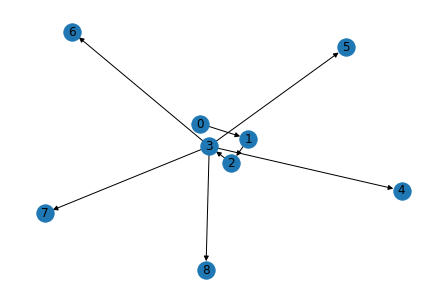

In [6]:
nx.draw(bfs2, with_labels = True)

In [7]:
s1 = list(bfs1.nodes)[0]
s1

'd'

In [8]:
t1 = list(bfs1.nodes)[-1]
t1

'a'

In [9]:
s2 = list(bfs2.nodes)[0]
s2

0

In [10]:
t2 = list(bfs2.nodes)[-1]
t2

8

### series operation

In [11]:
bfs3 = nx.relabel_nodes(bfs2, {s2:t1}) #relabel: t1=s2
series_operation = nx.compose(bfs1, bfs3)

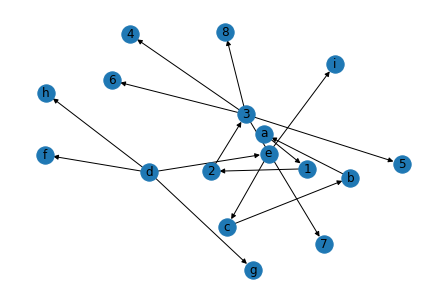

In [12]:
pos1 = nx.spring_layout(series_operation, k=0.8)
nx.draw(series_operation, pos1, with_labels = True)

### parallel operation

In [13]:
bfs4 = nx.relabel_nodes(bfs2, {s1:s2, t1:t2}) #relabel: s1=s2, t1=t2
parallel_operation = nx.compose(bfs1, bfs4)

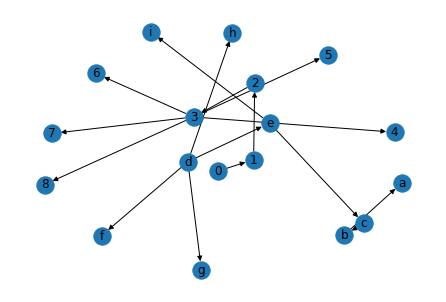

In [14]:
pos2 = nx.spring_layout(parallel_operation, k=0.8)
nx.draw(parallel_operation, pos2, with_labels = True)

### Write a program to produce a k-Tree graph

Your k:  4
Your n:  3


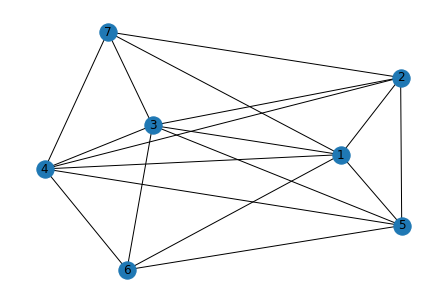

In [104]:
k = int(input("Your k: "))
while True:
    n = int(input("Your n: "))
    if n > 0 and n < k+5: # break loop if user enters 0
        node = list(range(1, k+1))
        G_tree = nx.Graph()
        G_tree.add_nodes_from(node)
        G_tree.add_edges_from(itertools.combinations(node, 2))
        for i in range(k+1, k+n+1):
            new_edge = []
            random_nodes = random.sample(list(G_tree.nodes), k)
            for j in range(k):
                new_edge.append((random_nodes[j], i))
                G_tree.add_node(i)
                G_tree.add_edges_from(new_edge)
        nx.draw(G_tree, with_labels = True)
        break